In [1]:
from sklearn import tree
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv(os.path.join("data/KidneyData.csv"))
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df = df.dropna(how='any')

In [4]:
data = df["classification"].copy()

data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.head()

,ckd,notckd
3,1,0
9,1,0
11,1,0
14,1,0
20,1,0


In [5]:
target = data_binary_encoded["ckd"]
target_names = ["negative", "positive"]

In [6]:
kidney_data = df.drop(columns=["classification", "id"], axis=1)

In [7]:
data1 = kidney_data.copy()

data_binary_encoded1 = pd.get_dummies(data1, columns=["rbc", "pc", "pcc", "ba", "htn", "dm", "cad", "appet", "pe", "ane"])
data_binary_encoded1.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,dm_no,dm_yes,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1,0,1,0,0,1,0,1,0,1
9,53.0,90.0,1.020,2.0,0.0,70.0,107.0,7.2,114.0,3.7,...,0,1,1,0,0,1,1,0,0,1
11,63.0,70.0,1.010,3.0,0.0,380.0,60.0,2.7,131.0,4.2,...,0,1,1,0,0,1,0,1,1,0
14,68.0,80.0,1.010,3.0,2.0,157.0,90.0,4.1,130.0,6.4,...,0,1,0,1,0,1,0,1,1,0
20,61.0,80.0,1.015,2.0,0.0,173.0,148.0,3.9,135.0,5.2,...,0,1,0,1,0,1,0,1,0,1


In [8]:
data_binary_encoded1.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc', 'rbc_abnormal', 'rbc_normal', 'pc_abnormal',
       'pc_normal', 'pcc_notpresent', 'pcc_present', 'ba_notpresent',
       'ba_present', 'htn_no', 'htn_yes', 'dm_no', 'dm_yes', 'cad_no',
       'cad_yes', 'appet_good', 'appet_poor', 'pe_no', 'pe_yes', 'ane_no',
       'ane_yes'],
      dtype='object')

In [9]:
kidney_binary_data = data_binary_encoded1.drop(columns=['rbc_normal', 'pc_normal', 'pcc_present', 'ba_present', 'htn_yes', 'dm_yes','cad_yes', 'appet_poor', 'pe_yes', 'ane_yes'])
kidney_binary_data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc', 'rbc_abnormal', 'pc_abnormal', 'pcc_notpresent',
       'ba_notpresent', 'htn_no', 'dm_no', 'cad_no', 'appet_good', 'pe_no',
       'ane_no'],
      dtype='object')

In [10]:
feature_names = kidney_binary_data.columns

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(kidney_binary_data, target, random_state=630)

# Decision Tree:

In [12]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

Decision Tree Confusion matrix, without normalization
[[28  0]
 [ 0 12]]
Decision Tree Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


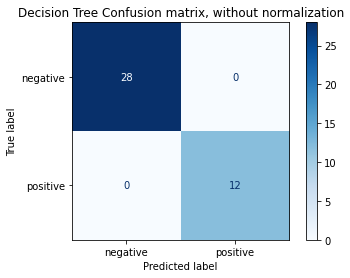

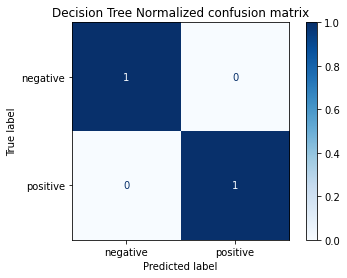

In [13]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Decision Tree Confusion matrix, without normalization", None),
                  ("Decision Tree Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Random Forest:

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

1.0

In [15]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.15543644540456406, 'al'),
 (0.14026179985386616, 'hemo'),
 (0.12889415184406647, 'sc'),
 (0.11893378039830313, 'pcv'),
 (0.10221464474023942, 'rc'),
 (0.07768343875755157, 'sg'),
 (0.0718377713368824, 'htn_no'),
 (0.057699790514136894, 'bu'),
 (0.03547423696660622, 'dm_no'),
 (0.026522584288097333, 'bgr'),
 (0.023274889795748033, 'pc_abnormal'),
 (0.0134086347059443, 'sod'),
 (0.009136399952143012, 'appet_good'),
 (0.00854072764033571, 'su'),
 (0.007321673777600027, 'rbc_abnormal'),
 (0.006127777802779762, 'wc'),
 (0.005808400771138175, 'bp'),
 (0.00417822457657684, 'pe_no'),
 (0.002213662879825214, 'pot'),
 (0.0019167418560897477, 'ane_no'),
 (0.0013903829180166517, 'age'),
 (0.0008715730450216291, 'cad_no'),
 (0.0008522661744672479, 'ba_notpresent'),
 (0.0, 'pcc_notpresent')]

# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [17]:
classifier.fit(X_train, y_train)

C:\Users\Travis Young\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [18]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 1.0


In [19]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [1 1 1 0 0 1 1 0 0 0]
First 10 Actual labels: [1, 1, 1, 0, 0, 1, 1, 0, 0, 0]


In [20]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
5,1,1
6,1,1
7,0,0
8,0,0
9,0,0


# SVC

In [21]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [22]:
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.975


In [23]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       1.00      0.96      0.98        28
    positive       0.92      1.00      0.96        12

    accuracy                           0.97        40
   macro avg       0.96      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



# One-Hot Encoding

In [24]:
from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.

# Scaling the Data:

In [25]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [26]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [27]:
from tensorflow.keras.utils import to_categorical

In [28]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=24, activation='relu', input_dim=24))
model.add(Dense(units=2, activation='softmax'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                600       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 50        
Total params: 650
Trainable params: 650
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 118 samples
Epoch 1/100
118/118 - 1s - loss: 1.1313 - accuracy: 0.2373
Epoch 2/100
118/118 - 0s - loss: 0.9852 - accuracy: 0.3475
Epoch 3/100
118/118 - 0s - loss: 0.8552 - accuracy: 0.4915
Epoch 4/100
118/118 - 0s - loss: 0.7396 - accuracy: 0.5508
Epoch 5/100
118/118 - 0s - loss: 0.6393 - accuracy: 0.6695
Epoch 6/100
118/118 - 0s - loss: 0.5506 - accuracy: 0.7288
Epoch 7/100
118/118 - 0s - loss: 0.4731 - accuracy: 0.7966
Epoch 8/100
118/118 - 0s - loss: 0.4112 - accuracy: 0.8559
Epoch 9/100
118/118 - 0s - loss: 0.3546 - accuracy: 0.9237
Epoch 10/100
118/118 - 0s - loss: 0.3078 - accuracy: 0.9576
Epoch 11/100
118/118 - 0s - loss: 0.2695 - accuracy: 0.9661
Epoch 12/100
118/118 - 0s - loss: 0.2356 - accuracy: 0.9746
Epoch 13/100
118/118 - 0s - loss: 0.2086 - accuracy: 0.9746
Epoch 14/100
118/118 - 0s - loss: 0.1851 - accuracy: 0.9746
Epoch 15/100
118/118 - 0s - loss: 0.1659 - accuracy: 0.9831
Epoch 16/100
118/118 - 0s - loss: 0.1495 - accuracy: 0.9831
Epoch 17/100
118/118 - 0s - 

In [33]:
deep_model = Sequential()
deep_model.add(Dense(units=24, activation='relu', input_dim=24))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [34]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 118 samples
Epoch 1/100
118/118 - 1s - loss: 0.6701 - accuracy: 0.4661
Epoch 2/100
118/118 - 0s - loss: 0.5856 - accuracy: 0.6271
Epoch 3/100
118/118 - 0s - loss: 0.5167 - accuracy: 0.8136
Epoch 4/100
118/118 - 0s - loss: 0.4648 - accuracy: 0.8983
Epoch 5/100
118/118 - 0s - loss: 0.4218 - accuracy: 0.9576
Epoch 6/100
118/118 - 0s - loss: 0.3860 - accuracy: 0.9661
Epoch 7/100
118/118 - 0s - loss: 0.3514 - accuracy: 0.9746
Epoch 8/100
118/118 - 0s - loss: 0.3186 - accuracy: 0.9915
Epoch 9/100
118/118 - 0s - loss: 0.2870 - accuracy: 1.0000
Epoch 10/100
118/118 - 0s - loss: 0.2578 - accuracy: 1.0000
Epoch 11/100
118/118 - 0s - loss: 0.2301 - accuracy: 1.0000
Epoch 12/100
118/118 - 0s - loss: 0.2039 - accuracy: 1.0000
Epoch 13/100
118/118 - 0s - loss: 0.1802 - accuracy: 1.0000
Epoch 14/100
118/118 - 0s - loss: 0.1588 - accuracy: 1.0000
Epoch 15/100
118/118 - 0s - loss: 0.1384 - accuracy: 1.0000
Epoch 16/100
118/118 - 0s - loss: 0.1209 - accuracy: 1.0000
Epoch 17/100
118/118 - 0s - 

In [35]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

40/40 - 0s - loss: 0.0051 - accuracy: 1.0000
Normal Neural Network - Loss: 0.005087689682841301, Accuracy: 1.0


In [36]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

40/40 - 0s - loss: 0.0018 - accuracy: 1.0000
Deep Neural Network - Loss: 0.0018428237177431583, Accuracy: 1.0


Logistic Regression Confusion matrix, without normalization
[[28  0]
 [ 0 12]]
Logistic Regression Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


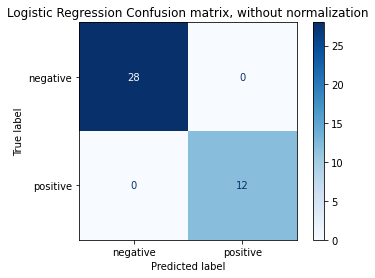

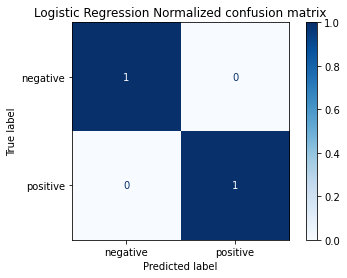

In [37]:
import numpy as np

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Logistic Regression Confusion matrix, without normalization", None),
                  ("Logistic Regression Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Linear Regression

In [46]:
X = kidney_binary_data
y = data_binary_encoded["ckd"].values.reshape(-1, 1)
print(X.shape, y.shape)
print(X)

(158, 24) (158, 1)
      age    bp     sg   al   su    bgr     bu   sc    sod  pot  ...  \
3    48.0  70.0  1.005  4.0  0.0  117.0   56.0  3.8  111.0  2.5  ...   
9    53.0  90.0  1.020  2.0  0.0   70.0  107.0  7.2  114.0  3.7  ...   
11   63.0  70.0  1.010  3.0  0.0  380.0   60.0  2.7  131.0  4.2  ...   
14   68.0  80.0  1.010  3.0  2.0  157.0   90.0  4.1  130.0  6.4  ...   
20   61.0  80.0  1.015  2.0  0.0  173.0  148.0  3.9  135.0  5.2  ...   
..    ...   ...    ...  ...  ...    ...    ...  ...    ...  ...  ...   
395  55.0  80.0  1.020  0.0  0.0  140.0   49.0  0.5  150.0  4.9  ...   
396  42.0  70.0  1.025  0.0  0.0   75.0   31.0  1.2  141.0  3.5  ...   
397  12.0  80.0  1.020  0.0  0.0  100.0   26.0  0.6  137.0  4.4  ...   
398  17.0  60.0  1.025  0.0  0.0  114.0   50.0  1.0  135.0  4.9  ...   
399  58.0  80.0  1.025  0.0  0.0  131.0   18.0  1.1  141.0  3.5  ...   

     rbc_abnormal pc_abnormal pcc_notpresent ba_notpresent  htn_no  dm_no  \
3               0           1          

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [48]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [49]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

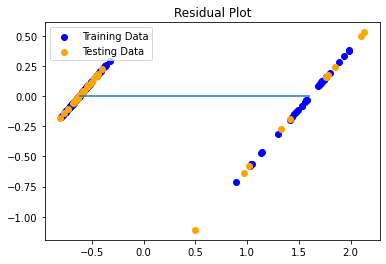

In [51]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()